In [3]:
import numpy as np
import matplotlib.pyplot as plt

class CompareFitter(object):
  """
  Given timeseries data, computes the sum of squared residuals of a linear fit
  and a quadratic fit, selects the better fit, and plots it.

  Args:
    time (np.array of float): 1D array of times
    data (np.array of float): 1D array of corresponding data points
  """

  def __init__(self, time, data):
    self.time = time
    self.data = data
    self.n_points = len(data)

    assert len(self.time) == self.n_points, "time and data must have same length!"

  def fit_line(self):
    """
    Fits a line to the timeseries and computes the sum of squared residuals of
    the fit. Uses numpy.polyfit:
    https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
    """

    # self.lin_coeffs is a list of the coefficients of the best fit line
    # self.linear_resids is a list of the sum of squared residuals to the best
    #   fit line.
    self.lin_coeffs, self.linear_resids, _, _, _ = np.polyfit(
        self.time, self.data, 1, full=True
    )

  def fit_quadratic(self):
    """
    Fits a quadratic function to the timeseries and computes the sum of squared
    residuals of the fit.
    """

    self.quad_coeffs, self.quadratic_resids, _, _, _ = np.polyfit(
        self.time, self.data, 2, full=True
    )

  def plot_best(self):
    """
    Plots the model with minimum sum of squared residuals.

    Uses numpy.poly1d:
    https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html
    (see "Examples" for usage applied here).
    """

    fig, ax = plt.subplots(figsize=(5,5))
    ax.scatter(self.time, self.data, color='purple')
    ax.set_xlabel('time'); ax.set_ylabel('data')

    if self.linear_resids <= self.quadratic_resids:
      p = np.poly1d(self.lin_coeffs)
      ax.plot(self.time, p(self.time), color='k')
    else:
      p = np.poly1d(self.quad_coeffs)
      ax.plot(self.time, p(self.time), color='k')

    return fig, ax

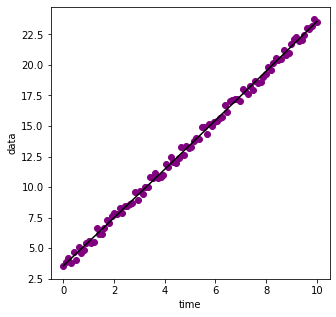

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def test_compare_fitter():
  # Generate some test data.
  time = np.linspace(0, 10, 100)
  data = 2 * time + 3 + np.random.rand(len(time))

  # Create a CompareFitter object.
  fitter = CompareFitter(time, data)

  # Fit a line and a quadratic to the data.
  fitter.fit_line()
  fitter.fit_quadratic()

  # Plot the best fit.
  fig, ax = fitter.plot_best()

  # Show the plot.
  plt.show()

def test_bad_input():
  try:
    cf = CompareFitter([1, 2, 3], [[1, 2, 3], [4, 5, 6]])
  except AssertionError as e:
    assert str(e) == "time and data must have same length!"

def test_nan_input():
  time = np.array([1, 2, 3, 4])
  data = np.array([1, np.nan, 3, 4])
  cf = CompareFitter(time, data)
  cf.fit_line()
  assert np.isnan(cf.linear_resids)
  cf.fit_quadratic()
  assert np.isnan(cf.quadratic_resids)

if __name__ == '__main__':
  test_compare_fitter()
  test_bad_input()
  test_nan_input()